In [1]:
import keras

Using TensorFlow backend.


In [2]:
#from keras.preprocessing import image
#from keras.engine import Layer
from keras.layers import Conv2D, Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras import optimizers
#from keras.layers import Activation, Dense, Dropout, Flatten
#from keras.layers.normalization import BatchNormalization
#from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#from time import time
import numpy as np
#import os
#import random
import tensorflow as tf
from PIL import Image, ImageFile
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [5]:
train_dir = './dataset/train'
seed = 6

imagePreProcesssing = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 30,
                                        brightness_range = [0.7, 1.3],
                                        horizontal_flip = True,
                                        zoom_range = 0.20)


x = imagePreProcesssing.flow_from_directory(train_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

y = imagePreProcesssing.flow_from_directory(train_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)
                           
train_generator = zip(x, y)



Found 689 images belonging to 1 classes.
Found 689 images belonging to 1 classes.


In [10]:
validation_dir = './dataset/validation'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


x = bw.flow_from_directory(validation_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

y = c.flow_from_directory(validation_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)

validation_generator = zip(x, y)

Found 214 images belonging to 1 classes.
Found 214 images belonging to 1 classes.


In [11]:
#Encoder
#play with the number of layers
encoder_input = Input(shape=(224, 224, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

In [12]:
#Decoder
#play with the number of layers
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(3, (3, 3), activation='tanh', padding='same')(decoder_output) #experiment with relu
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)

In [13]:
#model.summary()

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.002) #play with this

model.compile(opt, loss='mse', metrics=['accuracy'])

In [17]:
# steps_per_epoch: Total number of steps (batches of samples) to yield from generator
# before declaring one epoch finished and starting the next epoch.
# It should typically be equal to the number of samples if your dataset divided by the batch size.
steps = 30 ### 2)100/62%acc #### 1)21/50%acc
val_steps = 6
iterations = 1 ### 2)30 ### 1)20
#the amount of steps per epoch were chosen based on an example from the course about cats and dogs
#they had a ratio of the training size / 20

history = model.fit_generator(train_generator,
                              steps_per_epoch=steps,
                              epochs=iterations,
                              validation_data=validation_generator,
                              validation_steps=val_steps)

Epoch 1/1


C:\Users\Ivan Spajic\anaconda3\envs\AI_keras_env\lib\site-packages\PIL\Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 2/30 [=>............................] - ETA: 7:21 - loss: 0.3041 - accuracy: 0.4889

UnidentifiedImageError: cannot identify image file './dataset/train\\tanks\\war_tank (385).jpg'

In [81]:
#model.save_weights('testModel_weights(30steps500epochs).h5')

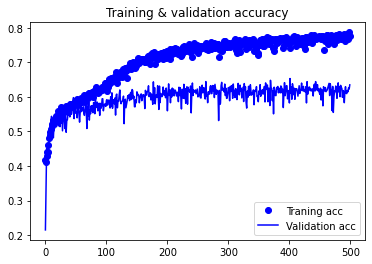

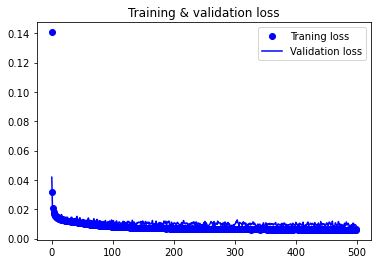

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & validation loss')
plt.legend()

plt.show()

In [12]:
history

In [21]:
test_dir = './dataset/test'
seed = 6

bw = ImageDataGenerator(rescale=1./255)
c = ImageDataGenerator(rescale=1./255)


test_x = bw.flow_from_directory(test_dir,
                          target_size=(224,224),
                          color_mode='grayscale',
                          class_mode=None,
                          seed=seed)

test_y = bw.flow_from_directory(test_dir,
                          target_size=(224,224),
                          class_mode=None,
                          seed=seed)

Found 11 images belonging to 1 classes.
Found 11 images belonging to 1 classes.


In [22]:
model.load_weights("testModel_weights(30steps500epochs).h5")

testpic = model.predict_on_batch(test_x[0])

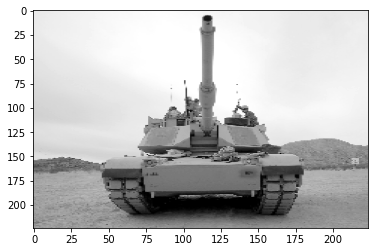

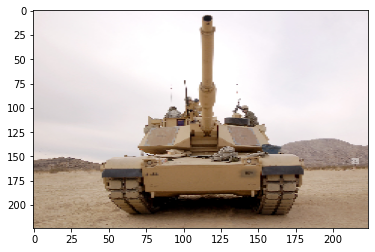

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


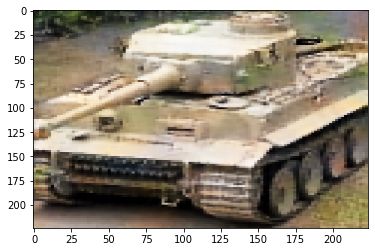

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


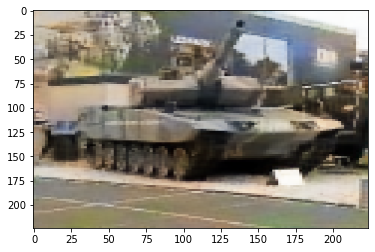

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


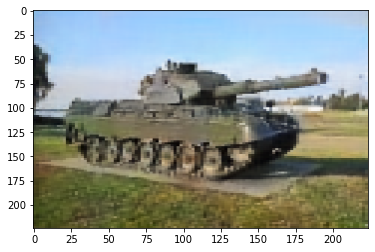

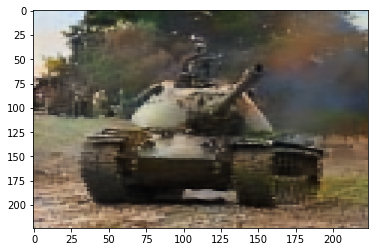

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


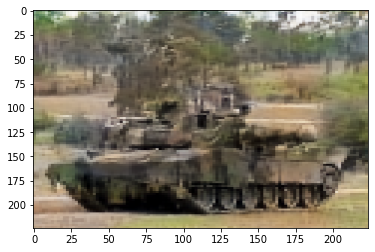

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


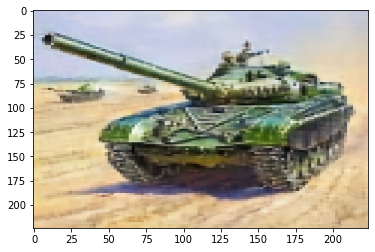

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


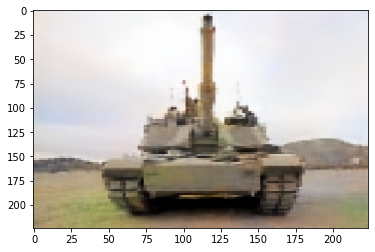

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


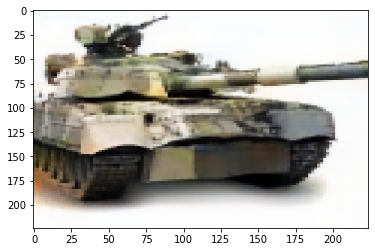

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


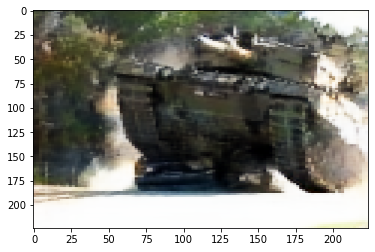

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


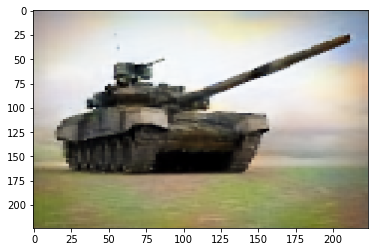

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


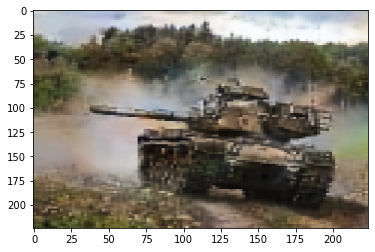

In [44]:
picNum = 6

plt.imshow(test_x[0][picNum],aspect="auto", cmap=plt.get_cmap('gray'))
plt.show()
#print(x[0])

plt.imshow(test_y[0][picNum],aspect="auto")
plt.show()

for i in range(0, 7):
for j in range(0, 31):
    plt.imshow(y[i][j],aspect="auto")
    plt.savefig('tankWaugmentation' + str(i) + str(j) + '.png')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


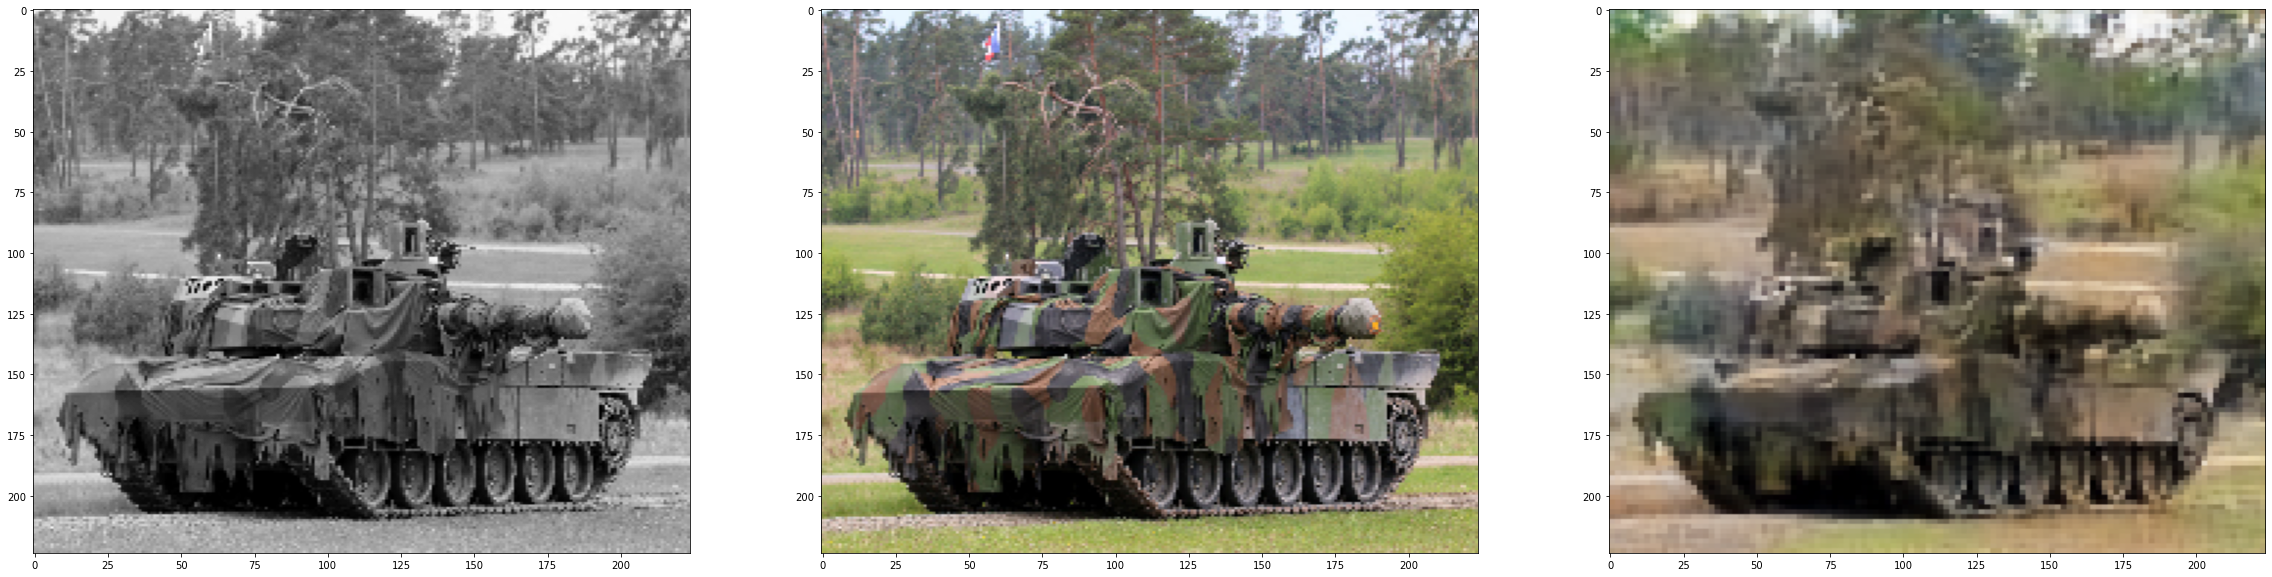

In [24]:
picNum = 4
f, axarr = plt.subplots(1,3, figsize=(40,10))
axarr[0].imshow(test_x[0][picNum],aspect="auto", cmap=plt.get_cmap('gray'))
axarr[1].imshow(test_y[0][picNum],aspect="auto")
axarr[2].imshow(testpic[picNum],aspect="auto")


In [25]:
testBatchSize = len(test_x[0])

TypeError: 'AxesSubplot' object is not subscriptable

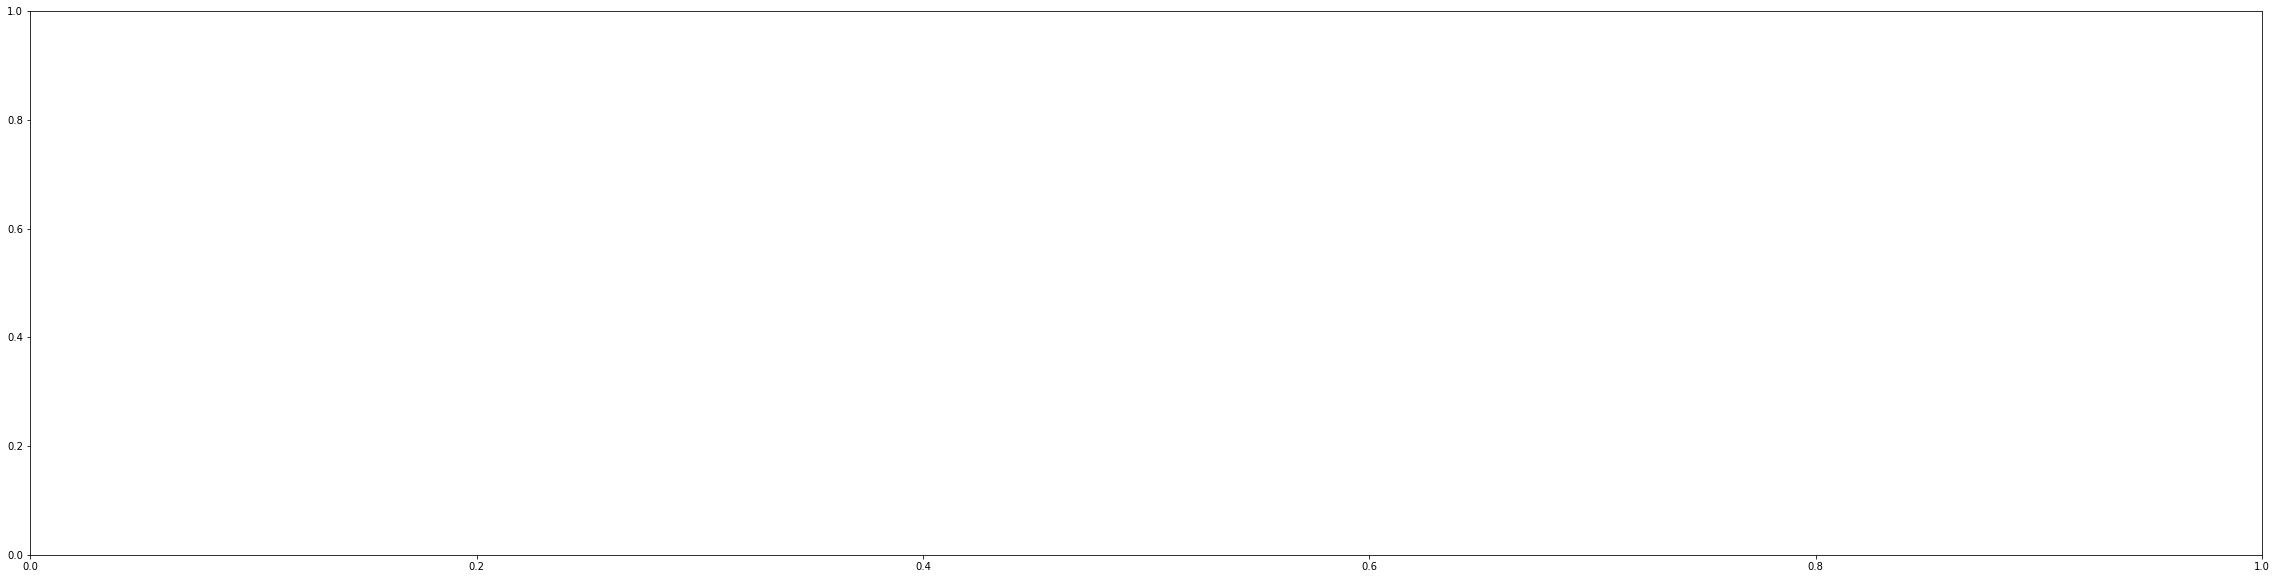

In [43]:
for i in range(0, testBatchSize):
    f, axarr = plt.subplots(1,3, figsize=(40,10))
    axarr[0].imshow(test_x[0][i],aspect="auto", cmap=plt.get_cmap('gray'))
    axarr[1].imshow(test_y[0][i],aspect="auto")
    axarr[2].imshow(testpic[i],aspect="auto")
    plt.show()